In [1]:
# --- 📦 Imports ---
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

print("Done!")

Done!


In [2]:
# --- 📥 Load and Prepare Data ---
file_path = "data/Coca-Cola_stock_history.csv"
df = pd.read_csv(file_path)
df["Date"] = pd.to_datetime(pd.to_datetime(df["Date"], format='ISO8601', utc=True).dt.date)
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
1962-01-09,0.047664,0.048778,0.047292,0.048530,960000,0.0,0
1962-01-10,0.048530,0.049459,0.048035,0.048778,1612800,0.0,0
1962-01-11,0.048778,0.049273,0.048530,0.049273,614400,0.0,0
1962-01-12,0.049273,0.049273,0.048406,0.048902,883200,0.0,0


In [3]:
# Check for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15311 entries, 1962-01-02 to 2022-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15311 non-null  float64
 1   High          15311 non-null  float64
 2   Low           15311 non-null  float64
 3   Close         15311 non-null  float64
 4   Volume        15311 non-null  int64  
 5   Dividends     15311 non-null  float64
 6   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 956.9 KB
None
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [4]:
# --- 📊 Basic Overview ---
print("📌 Shape:", df.shape)
print("📅 Date Range:", df.index.min(), "→", df.index.max())
print("\n🧠 Data Types:\n", df.dtypes)
print("\n🧼 Missing Values:\n", df.isna().sum())

# --- 📈 Descriptive Statistics ---
display(df.describe().T)

📌 Shape: (15311, 7)
📅 Date Range: 1962-01-02 00:00:00 → 2022-10-26 00:00:00

🧠 Data Types:
 Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

🧼 Missing Values:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Open,15311.0,1.181288e+01,1.502573e+01,0.037154,2.384531e-01,4.935146e+00,1.738393e+01,6.603793e+01
High,15311.0,1.190671e+01,1.513334e+01,0.037279,2.403054e-01,4.980985e+00,1.761284e+01,6.623506e+01
Low,15311.0,1.171738e+01,1.491558e+01,0.034890,2.364148e-01,4.884242e+00,1.716828e+01,6.477631e+01
Close,15311.0,1.181541e+01,1.502632e+01,0.037028,2.383120e-01,4.937339e+00,1.741511e+01,6.525927e+01
Volume,15311.0,9.139213e+06,7.957947e+06,76800.000000,2.889600e+06,7.708800e+06,1.307130e+07,1.241690e+08
Dividends,15311.0,1.678048e-03,2.130196e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e-01
Stock Splits,15311.0,1.110313e-03,4.914762e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00


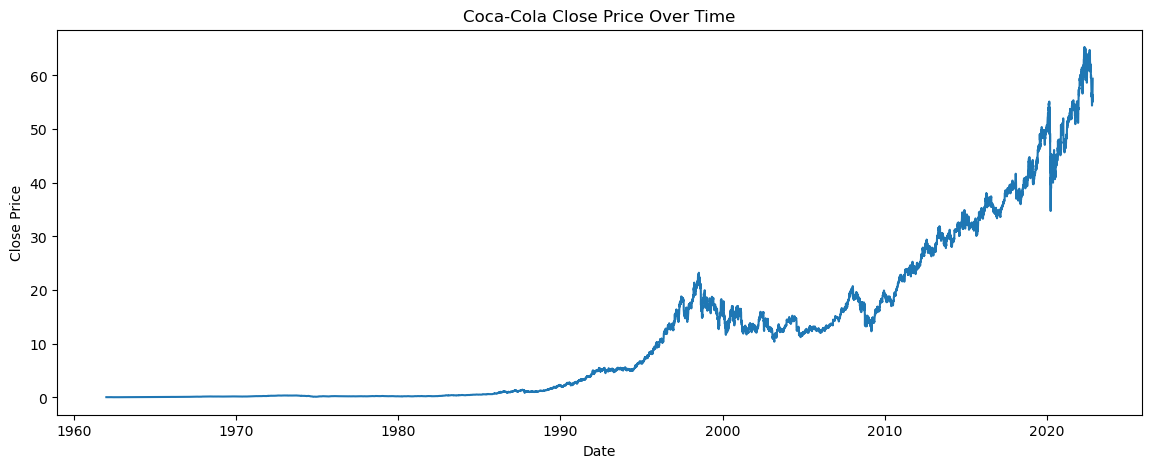

In [5]:
# --- 📉 Close Price Over Time ---
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title("Coca-Cola Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

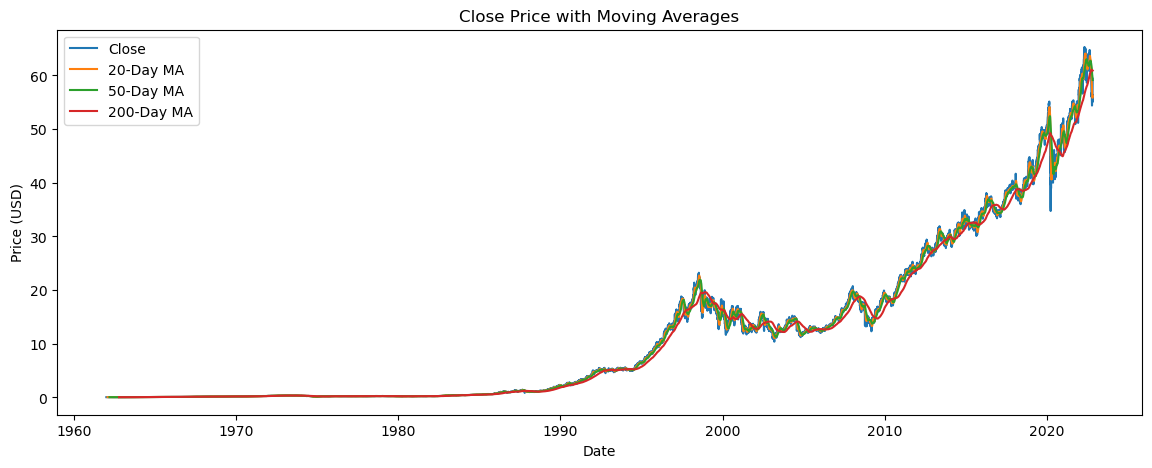

In [6]:
# --- 📈 Price + Moving Averages ---
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(50).mean()
df["MA200"] = df["Close"].rolling(200).mean()

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x=df.index, y="Close", label="Close")
sns.lineplot(data=df, x=df.index, y="MA20", label="20-Day MA")
sns.lineplot(data=df, x=df.index, y="MA50", label="50-Day MA")
sns.lineplot(data=df, x=df.index, y="MA200", label="200-Day MA")
plt.title("Close Price with Moving Averages")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.show()

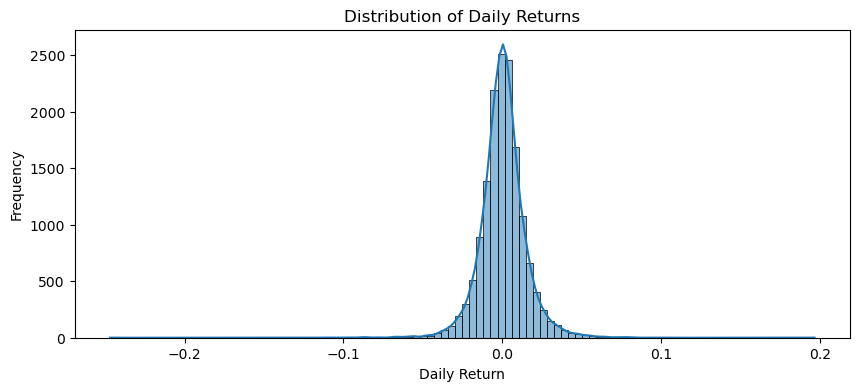

In [7]:
# --- 🔁 Daily Returns ---
df["Daily_Return"] = df["Close"].pct_change()

plt.figure(figsize=(10, 4))
sns.histplot(df["Daily_Return"].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

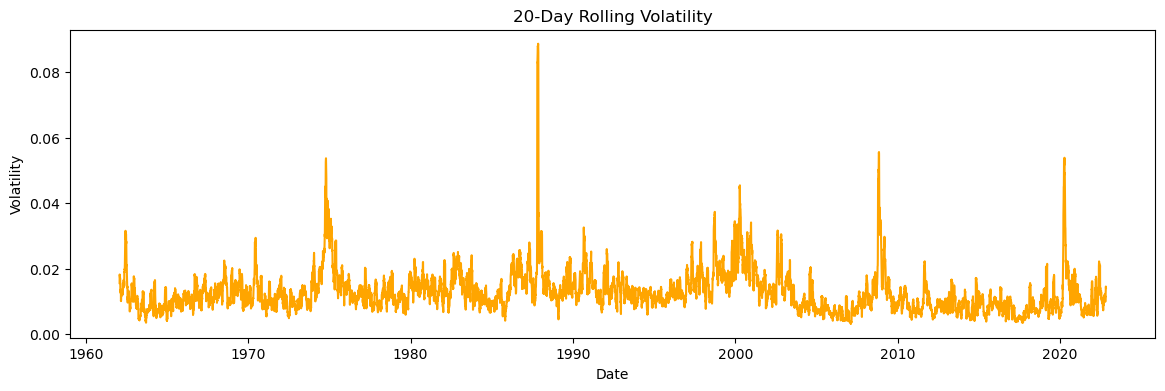

In [8]:
# --- ⚠️ Volatility (Rolling STD) ---
df["Volatility_20d"] = df["Daily_Return"].rolling(20).std()

plt.figure(figsize=(14, 4))
sns.lineplot(x=df.index, y=df["Volatility_20d"], color="orange")
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

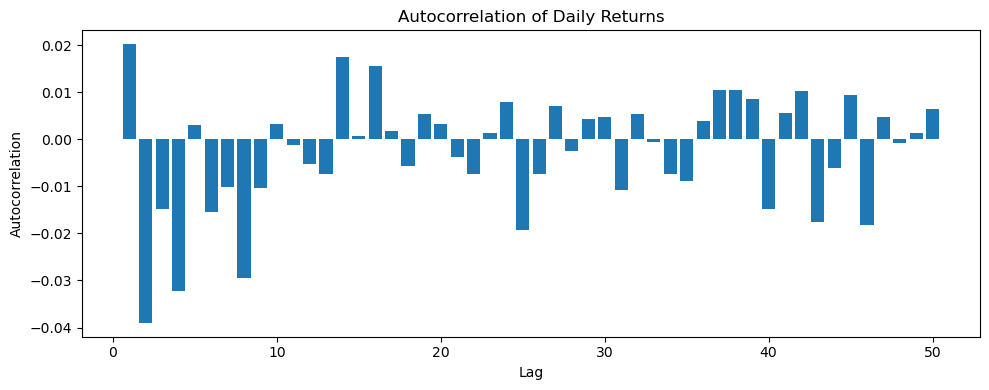

In [9]:
# Autocorrelation
plt.figure(figsize=(10, 4))
lags = 50
autocorr_values = [df["Daily_Return"].autocorr(lag=lag) for lag in range(1, lags + 1)]
plt.bar(range(1, lags + 1), autocorr_values)
plt.title("Autocorrelation of Daily Returns")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

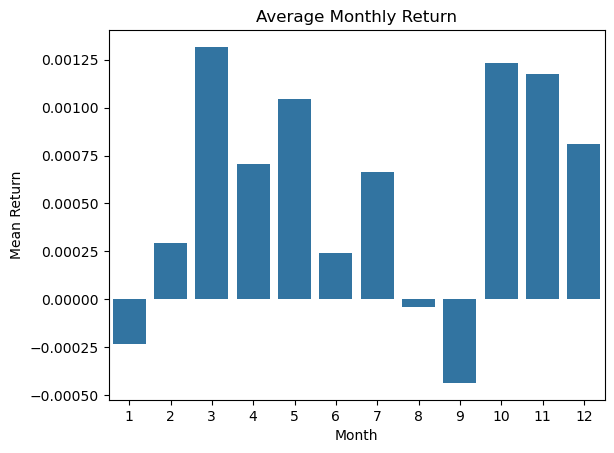

In [10]:
# Monthly average returns
df['Year'] = df.index.year
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')["Daily_Return"].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Monthly Return")
plt.xlabel("Month")
plt.ylabel("Mean Return")
plt.show()

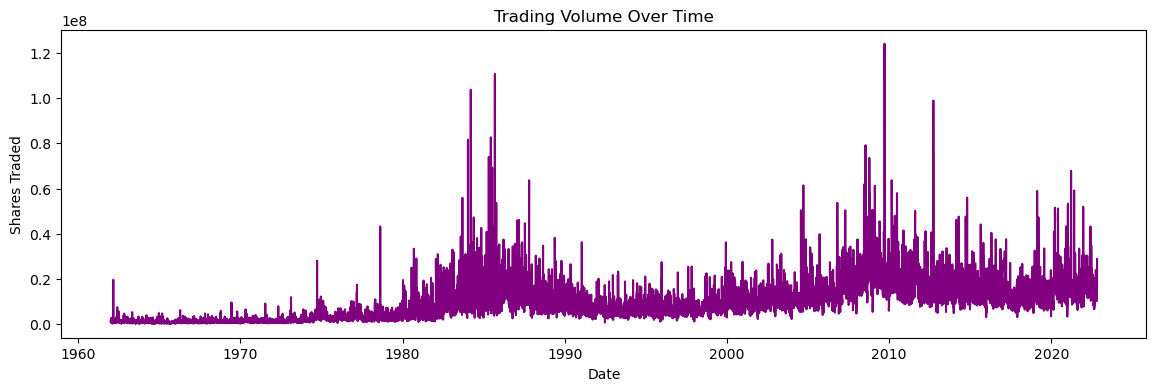

In [11]:
# --- 🔊 Volume Over Time ---
plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x=df.index, y="Volume", color="purple")
plt.title("Trading Volume Over Time")
plt.ylabel("Shares Traded")
plt.show()

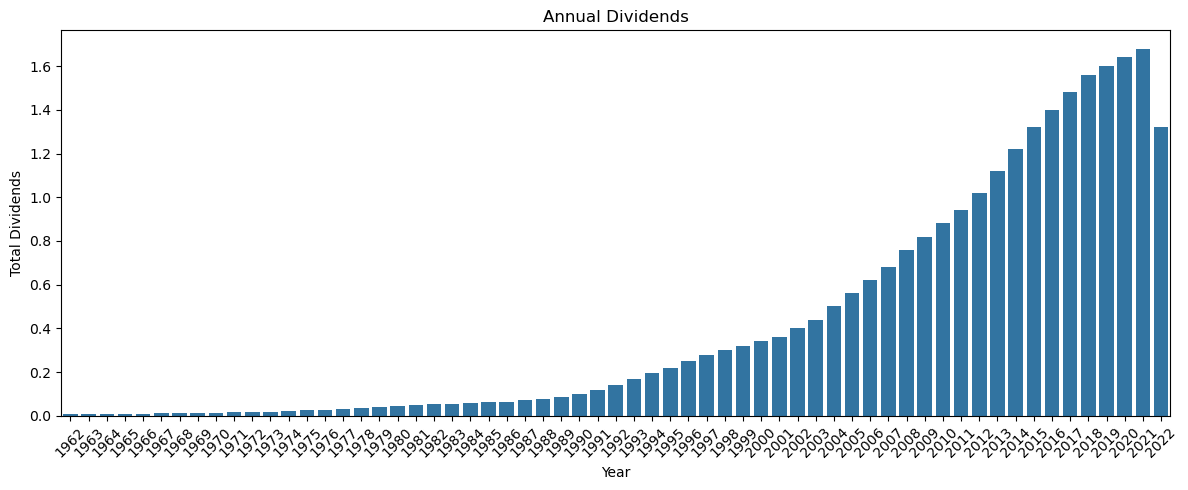

In [12]:
# --- 💵 Dividend Payouts Over Time ---
annual_dividends = df['Dividends'].resample('YE').sum()
plt.figure(figsize=(12, 5))
sns.barplot(x=annual_dividends.index.year, y=annual_dividends.values )
plt.title("Annual Dividends")
plt.xlabel("Year")
plt.ylabel("Total Dividends")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

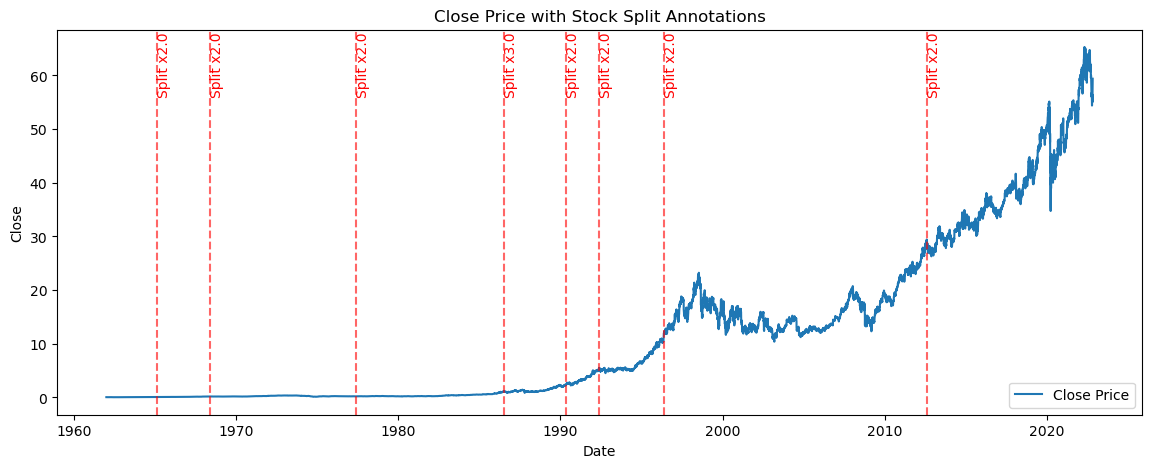

In [13]:
# --- ✂️ Stock Splits Over Time ---
splits = df[df["Stock Splits"] > 1]

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x=df.index, y="Close", label="Close Price")
for date, row in splits.iterrows():
    plt.axvline(x=date, color="red", linestyle="--", alpha=0.6)
    plt.text(date, df["Close"].max() * 0.95,
             f'Split x{row["Stock Splits"]:.1f}', rotation=90,
             verticalalignment='center', color="red")
plt.title("Close Price with Stock Split Annotations")
plt.show()

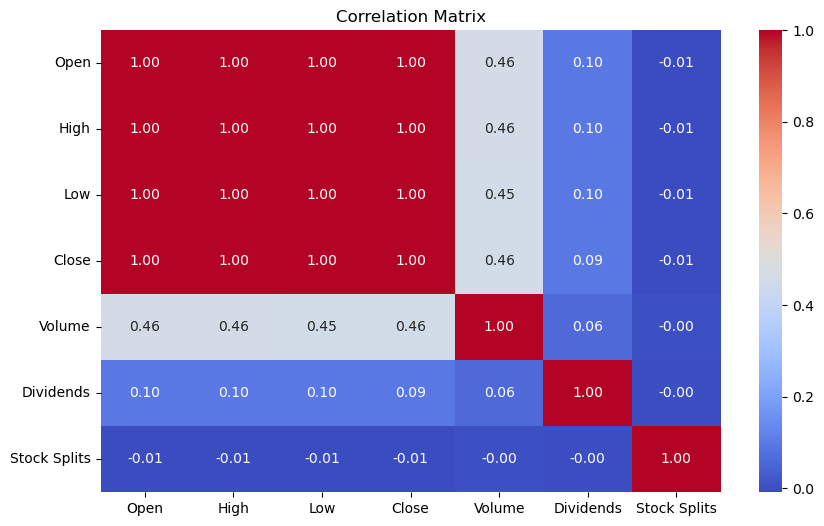

In [14]:
# --- 🔗 Correlation Heatmap ---
corr = df[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
# --- 🧠 Final Feature Check ---
print("\n✅ Final Columns in EDA DataFrame:")
print(df.columns.tolist())
df.to_csv("data/processed.csv")


✅ Final Columns in EDA DataFrame:
['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'MA20', 'MA50', 'MA200', 'Daily_Return', 'Volatility_20d', 'Year', 'Month']


# Conclusion of Coca-Cola Stock Analysis

This exploratory data analysis of Coca-Cola (KO) stock history provides comprehensive insights into its long-term performance, volatility, and key market events, derived directly from the provided dataset.

## Key Findings:

* **Long-Term Performance and Trend**: The dataset covers a significant historical period for Coca-Cola stock, starting from 1962-01-02. Observations of the `Close` price, along with the calculated Simple Moving Averages (SMA 50 and SMA 200), suggest a general upward trend over this extensive period, indicating the stock's long-term growth.
* **Volatility and Returns**: The analysis includes the calculation of daily returns, with a histogram visually representing their distribution. This distribution typically shows a concentration around zero, with occasional larger positive and negative daily returns, reflecting the inherent volatility of stock prices. The 'Daily Volatility' plot further highlights periods of increased price fluctuations.
* **Trading Volume Dynamics**: The `Volume` trend over time indicates periods of high trading activity, with noticeable spikes that could correspond to significant market interest or events related to the company. The substantial average daily trading volume points to high liquidity for KO shares.
* **Dividend Payouts**: The analysis clearly shows a history of `Dividends` being paid out by Coca-Cola. The 'Annual Dividends' bar plot illustrates a consistent and likely increasing trend in dividend payments over the years, which is a characteristic attractive to income-oriented investors.
* **Stock Splits**: The dataset contains records of `Stock Splits`, which are events where the company adjusted its outstanding shares. These splits are visually marked on the `Close` price chart, providing context for historical price adjustments and increased share affordability.
* **Correlation of Stock Metrics**: A correlation heatmap was generated, showing strong positive correlations among `Open`, `High`, `Low`, and `Close` prices, which is typical for sequential stock data. `Volume` and `Dividends` exhibit weaker correlations with the price movements, indicating they are influenced by different underlying factors.

## Summary:

Based on the provided data, the Coca-Cola stock demonstrates characteristics of a stable, mature investment. Its history is marked by a long-term upward price trend, consistent dividend payments, and strategic stock splits. While exhibiting typical market volatility, the stock's high liquidity and dividend policy make it a noteworthy consideration for investors seeking long-term growth and income.